<a href="https://colab.research.google.com/github/sri976/generative-AI-2025/blob/main/2033_W10_A10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow scikit-learn matplotlib

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9198 - loss: 0.2722 - val_accuracy: 0.9870 - val_loss: 0.0374
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9873 - loss: 0.0387 - val_accuracy: 0.9891 - val_loss: 0.0331
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9911 - val_loss: 0.0268
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.9942 - loss: 0.0170 - val_accuracy: 0.9899 - val_loss: 0.0323
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9909 - val_loss: 0.0297
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9966 - loss: 0.0107 - val_accuracy: 0.9912 - val_loss: 0.0303
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9902 - val_loss: 0.0322
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9971 -

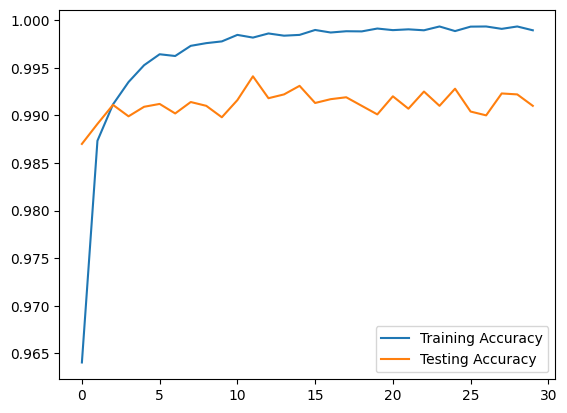

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9885 - loss: 0.0815
Testing Accuracy: 0.99
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9992 - loss: 0.0026
Training Accuracy: 1.00


In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape and normalize input data
X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Define CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(33, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Plot training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.legend()
plt.show()

# Evaluate model on testing data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Testing Accuracy: {test_acc:.2f}')

# Evaluate model on training data
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_acc:.2f}')